# Part 1.3: Point Cloud Alignment Problem

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
# Note Matplotlib is only suitable for simple 3D visualization.
# For later problems, you should not use Matplotlib to do the plotting
def show_points(points):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points[0], points[2], points[1])
    
def compare_points(points1, points2):
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points1[0], points1[2], points1[1])
    ax.scatter(points2[0], points2[2], points2[1])    

(3, 2000) (3, 2000)


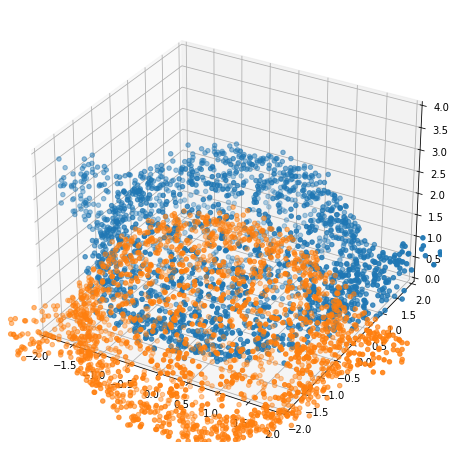

In [3]:
npz = np.load('../data/HW1_P1.npz')
X = npz['X']
Y = npz['Y']

print(X.shape, Y.shape)
compare_points(X, Y)  # noisy teapotsand

In [4]:
def compute_hlambda(A, b, eps, lambd):
    term1 = np.matmul(A.T, A) + 2*lambd*np.eye(A.shape[1])
    term2 = np.linalg.inv(term1)
    term3 = np.matmul(A.T, b)
    
    hlambda = np.matmul(term2, term3)
    return hlambda

In [5]:
def compute_glambda(A, b, eps, lambd):
    hlambda = compute_hlambda(A, b, eps, lambd)
    glambda = np.matmul(hlambda.T, hlambda) - eps
    
    return glambda

In [6]:
def get_skew_from_vector(v):
    v = np.reshape(v, (v.shape[0],))
    return np.array([[0, -v[2], v[1]], 
                     [v[2], 0, -v[0]], 
                     [-v[1], v[0], 0]])

In [7]:
# copy-paste your hw0 solve module here
def hw0_solve(A, b, eps):
    # Line search using Bisection method
    start = 0
    end = 10000000
    
    # your implementation here
    g_start = compute_glambda(A, b, eps, start)
    g_end = compute_glambda(A, b, eps, end)
    
#     print(g_start, g_end)
    
    if (g_start * g_end >= 0):
        print("You have not assumed right start and end points \n")
        return np.zeros(A.shape[1])
  
    mid = start
    while ((end-start) >= 1e-3):
 
        # Find middle point
        mid = (start+end)/2
        
        glambda_mid = compute_glambda(A, b, eps, mid)
  
        # Check if middle point is root
        if (glambda_mid <= 1e-14):
            break
  
        # Decide the side to repeat the steps
        if (glambda_mid * compute_glambda(A, b, eps, start) < 0):
            end = mid
        else:
            start = mid
             
#     print("Optimal lambda : ","%.4f"%mid)

    return compute_hlambda(A, b, eps, mid)

In [13]:
R1 = np.eye(3)  # (3,3)
num_pts = X.shape[1]  # =n
assert(X.shape == Y.shape)

A = np.zeros((3*num_pts, 3))
B = np.zeros((3*num_pts, 1))
eps = 1e-5

# solve this problem here, and store your final results in R1
for __ in tqdm(range(10000)):
    
    B = Y - np.matmul(R1, X)   # (3,n)
    B = np.reshape(B, newshape=(3*num_pts,1), order='F')   # (3n,1)
    
#     for i in range(num_pts):
#         A[3*i+0,:] = np.cross(X[:,i], R1[0,:])
#         A[3*i+1,:] = np.cross(X[:,i], R1[1,:])
#         A[3*i+2,:] = np.cross(X[:,i], R1[2,:])

    temp1 = np.repeat(np.transpose(X), repeats=3, axis=0)
    temp2 = np.tile(R1, reps=(num_pts,1))
    A = np.cross(temp1, temp2)
        
    delta_omega = hw0_solve(A, B, eps)
#     print("Delta Omega:", delta_omega)
    
    # update rotation matrix R
    R1 = np.matmul(R1, (np.eye(3) + get_skew_from_vector(delta_omega)))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [9]:
# X_temp = np.random.randint(1, 5, (3,5))
# R_temp = np.random.randint(1, 5, (3,3))
# print(X_temp)
# print(R_temp)

In [10]:
# X_temp = np.transpose(X_temp)
# # print(X_temp)
# X_temp = np.repeat(X_temp, 3, axis=0)
# print(X_temp)
# R_temp = np.tile(R_temp, (5,1))
# print(R_temp)
# np.cross(R_temp, X_temp)
# np.reshape(X_temp, (15,1), order='F')

## Point cloud aligned result

R.T R:
 [[ 1.00126409e+00 -2.20266262e-04  1.60448760e-04]
 [-2.20266262e-04  1.00042413e+00  5.19202708e-04]
 [ 1.60448760e-04  5.19202708e-04  1.00104319e+00]] 

det(R): 1.0013657494101809


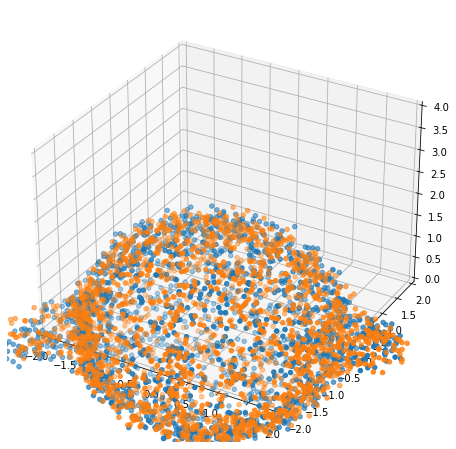

In [14]:
# Testing code, you should see the points of the 2 teapots roughly overlap
compare_points(R1@X, Y)
print("R.T R:\n", R1.T@R1, "\n")
print("det(R):", np.linalg.det(R1))